In [1]:
from keras.models import model_from_json

json = open('model2.json', 'r')
model_json = json.read()
json.close()
model = model_from_json(model_json)
model.load_weights('model2.h5')

In [2]:
import tensorflow as tf

import pandas as pd
import numpy as np

from tqdm.notebook import tqdm  

import os

from keras_preprocessing.image import load_img

In [3]:
TEST_DIR = 'test'

In [4]:
image_paths = []

for img_name in os.listdir(TEST_DIR):
    image_paths.append(os.path.join(TEST_DIR, img_name))

image_paths

['test\\image_1.jpg',
 'test\\image_10.jpg',
 'test\\image_100.jpg',
 'test\\image_101.jpg',
 'test\\image_102.jpg',
 'test\\image_103.jpg',
 'test\\image_104.jpg',
 'test\\image_105.jpg',
 'test\\image_106.jpg',
 'test\\image_107.jpg',
 'test\\image_108.jpg',
 'test\\image_109.jpg',
 'test\\image_11.jpg',
 'test\\image_110.jpg',
 'test\\image_111.jpg',
 'test\\image_112.jpg',
 'test\\image_113.jpg',
 'test\\image_114.jpg',
 'test\\image_115.jpg',
 'test\\image_116.jpg',
 'test\\image_117.jpg',
 'test\\image_118.jpg',
 'test\\image_119.jpg',
 'test\\image_12.jpg',
 'test\\image_120.jpg',
 'test\\image_121.jpg',
 'test\\image_122.jpg',
 'test\\image_123.jpg',
 'test\\image_124.jpg',
 'test\\image_125.jpg',
 'test\\image_126.jpg',
 'test\\image_127.jpg',
 'test\\image_128.jpg',
 'test\\image_129.jpg',
 'test\\image_13.jpg',
 'test\\image_130.jpg',
 'test\\image_131.jpg',
 'test\\image_132.jpg',
 'test\\image_133.jpg',
 'test\\image_134.jpg',
 'test\\image_135.jpg',
 'test\\image_136.jpg'

In [5]:
features = []

for img_path in tqdm(image_paths):
    pass

  0%|          | 0/500 [00:00<?, ?it/s]

In [6]:
BATCH_SIZE = 64
IMG_SIZE = (160, 160)

In [7]:
pred_dataset = tf.keras.utils.image_dataset_from_directory('test2', shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, labels=None)
# pred_dataset = tf.data.Dataset.from_tensor_slices([f'test/image_{i+1}' for i in range(500))


Found 500 files belonging to 1 classes.


In [8]:
import matplotlib.pyplot as plt

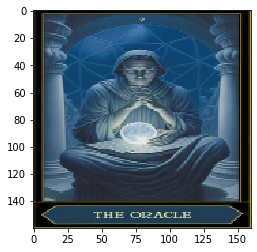

In [9]:
plt.imshow(np.int16(next(pred_dataset.as_numpy_iterator())[1]), interpolation='nearest')

In [10]:
class_names = ['AI', 'Real']

In [11]:
# Retrieve a batch of images from the test set
outs = []

for image_batch in pred_dataset.as_numpy_iterator():
  predictions = model.predict_on_batch(image_batch).flatten()

  predictions = np.round(predictions)
  predictions = np.int8(predictions)
  predictions = tf.convert_to_tensor(predictions)

  outs.extend([class_names[i] for i in list(predictions.numpy())])
  print('Predictions:\n', predictions.numpy())

  # plt.figure(figsize=(10, 10))
  # for i in range(9):
  #   ax = plt.subplot(3, 3, i + 1)
  #   plt.imshow(image_batch[i].astype("uint8"))
  #   plt.title(class_names[predictions[i]])
  #   plt.axis("off")

print(outs)

Predictions:
 [1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1]
Predictions:
 [0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1
 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1]
Predictions:
 [1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0]
Predictions:
 [1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0]
Predictions:
 [0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0
 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0]
Predictions:
 [0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0]
Predictions:
 [1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 

In [12]:
len(outs)

500

In [13]:
csv_outs = []
for i, p in enumerate(outs):
    csv_outs.append([f'image_{i+1}', p])
print(csv_outs)

[['image_1', 'Real'], ['image_2', 'AI'], ['image_3', 'AI'], ['image_4', 'Real'], ['image_5', 'AI'], ['image_6', 'AI'], ['image_7', 'Real'], ['image_8', 'Real'], ['image_9', 'AI'], ['image_10', 'Real'], ['image_11', 'AI'], ['image_12', 'AI'], ['image_13', 'AI'], ['image_14', 'AI'], ['image_15', 'Real'], ['image_16', 'AI'], ['image_17', 'AI'], ['image_18', 'AI'], ['image_19', 'AI'], ['image_20', 'Real'], ['image_21', 'AI'], ['image_22', 'AI'], ['image_23', 'Real'], ['image_24', 'AI'], ['image_25', 'AI'], ['image_26', 'AI'], ['image_27', 'AI'], ['image_28', 'AI'], ['image_29', 'Real'], ['image_30', 'AI'], ['image_31', 'AI'], ['image_32', 'Real'], ['image_33', 'AI'], ['image_34', 'Real'], ['image_35', 'AI'], ['image_36', 'Real'], ['image_37', 'AI'], ['image_38', 'Real'], ['image_39', 'Real'], ['image_40', 'AI'], ['image_41', 'Real'], ['image_42', 'AI'], ['image_43', 'Real'], ['image_44', 'Real'], ['image_45', 'AI'], ['image_46', 'Real'], ['image_47', 'Real'], ['image_48', 'AI'], ['image_49

In [85]:
import csv

with open('outs.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile)
     wr.writerows(csv_outs)